In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('kaggle_movie_train.csv')

In [7]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [8]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [9]:
df.size

67737

In [10]:
df.shape

(22579, 3)

In [11]:
df.genre

0        thriller
1          comedy
2           drama
3        thriller
4           drama
           ...   
22574       drama
22575       drama
22576    thriller
22577      action
22578      comedy
Name: genre, Length: 22579, dtype: object

In [12]:
df.genre.unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [13]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [14]:
df.shape

(22579, 3)

In [15]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import seaborn as sns

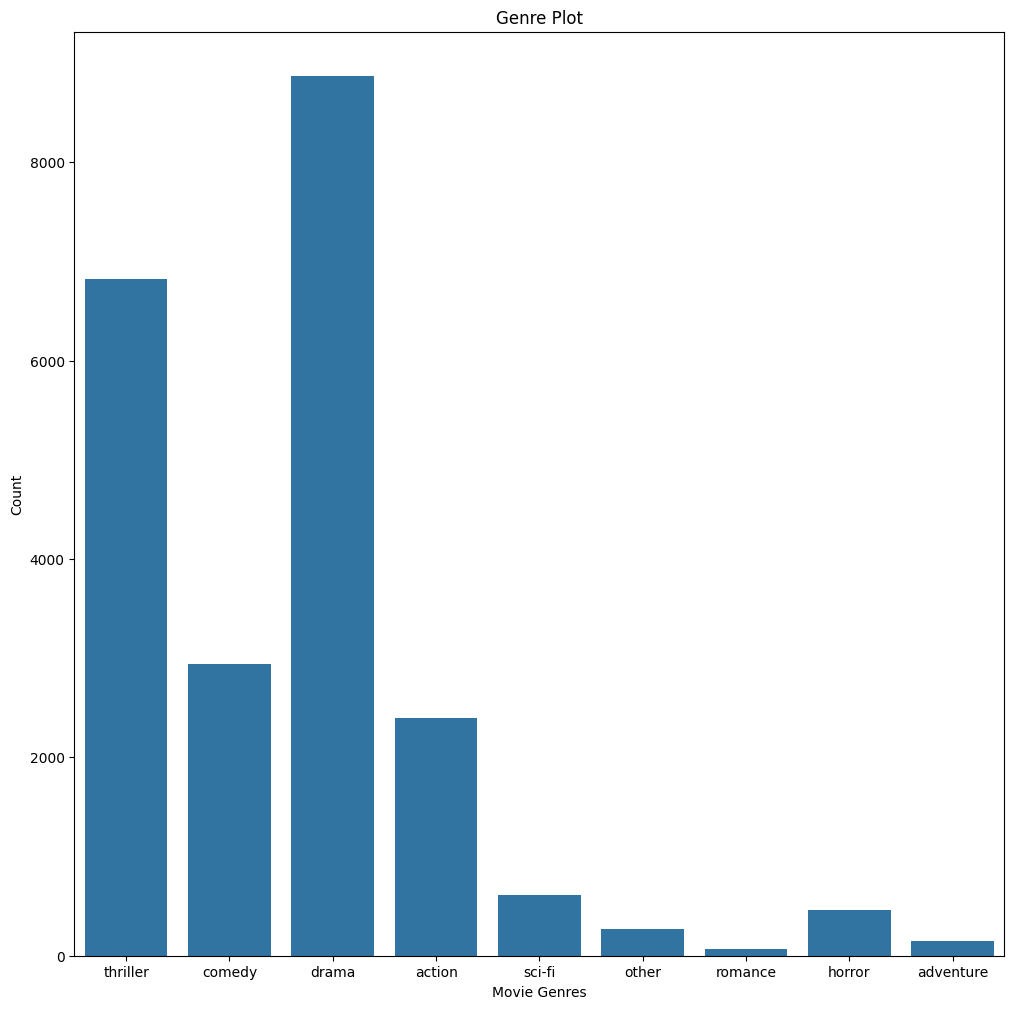

In [20]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre' , data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()


In [21]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [22]:
genre_mapper = {'other':0,'action':1,'adventure':2,'comedy':3,'drama':4,'horror':5,'romance':6 ,'sci-fi':7,'thriller':8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [23]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [24]:
df.drop('id',axis=1,inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [25]:
#nltk=NLP Tool Kit
#stopwords = removing the , is ,for etc
#corpus = all words
#stemming = runing , ran etc to run
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-ZZ]' , repl=' ',string=df['text'][i])
    dialog = dialog.lower()
    words = dialog.split()
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in dialog_words]
    dialog =' '.join(words)
    corpus.append(dialog)

In [50]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [51]:
df[df['genre']==2].index

Index([  325,   460,   540,   647,   905,  1075,  1424,  1528,  1572,  1575,
       ...
       20801, 20932, 21083, 21195, 21270, 21627, 21769, 22450, 22454, 22476],
      dtype='int64', length=147)

In [52]:
len(corpus)

22579

In [53]:
drama_words = []
for i in list(df[df['genre']==4].index):
    drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
    action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==4].index):
    comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = '' 
for i in range(0,3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]
    



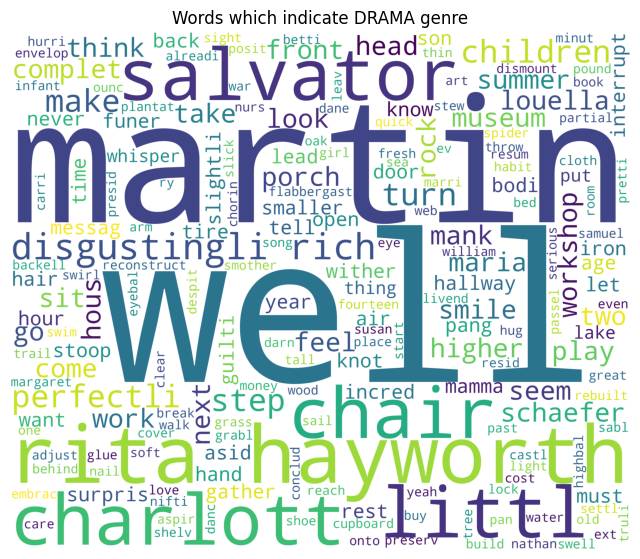

In [62]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color = 'white',width=3000,height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Words which indicate DRAMA genre')
plt.show()

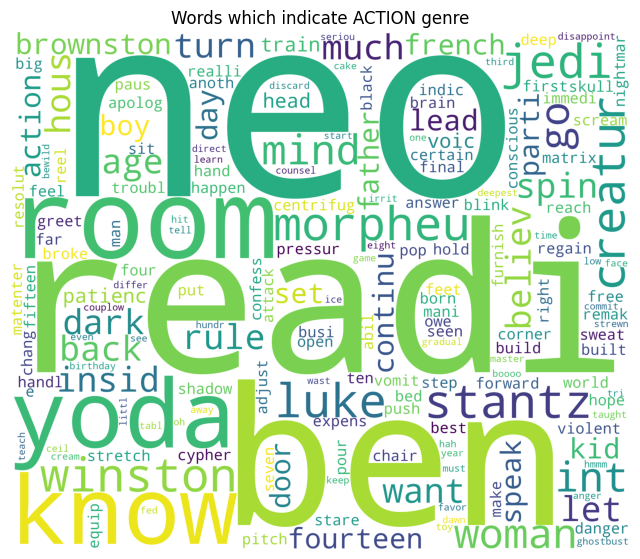

In [63]:
from wordcloud import WordCloud
wordcloud2 = WordCloud(background_color = 'white',width=3000,height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Words which indicate ACTION genre')
plt.show()

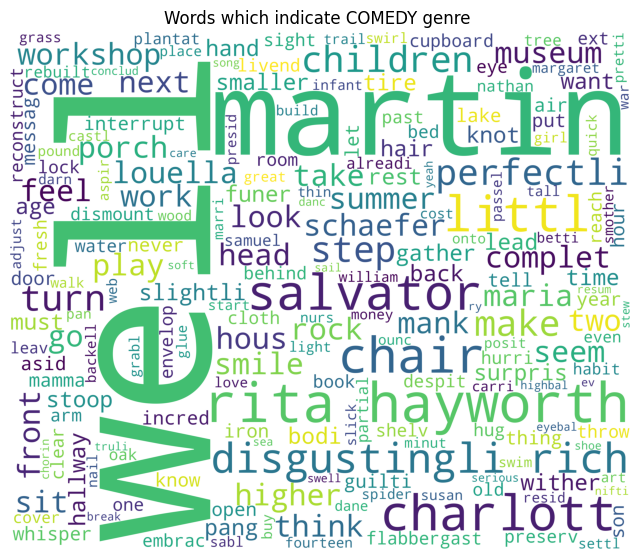

In [64]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate COMEDY genre ")
plt.show()

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1, 2))
X = cv.fit_transform(corpus).toarray()

In [68]:
y = df['genre'].values

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


In [72]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)

MultinomialNB()

In [73]:
nb_y_pred = nb_classifier.predict(X_test)

In [76]:
nb_classifier.score(X_test,y_test)

0.895704162976085

In [77]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test , nb_y_pred)

In [78]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]],
      dtype=int64)

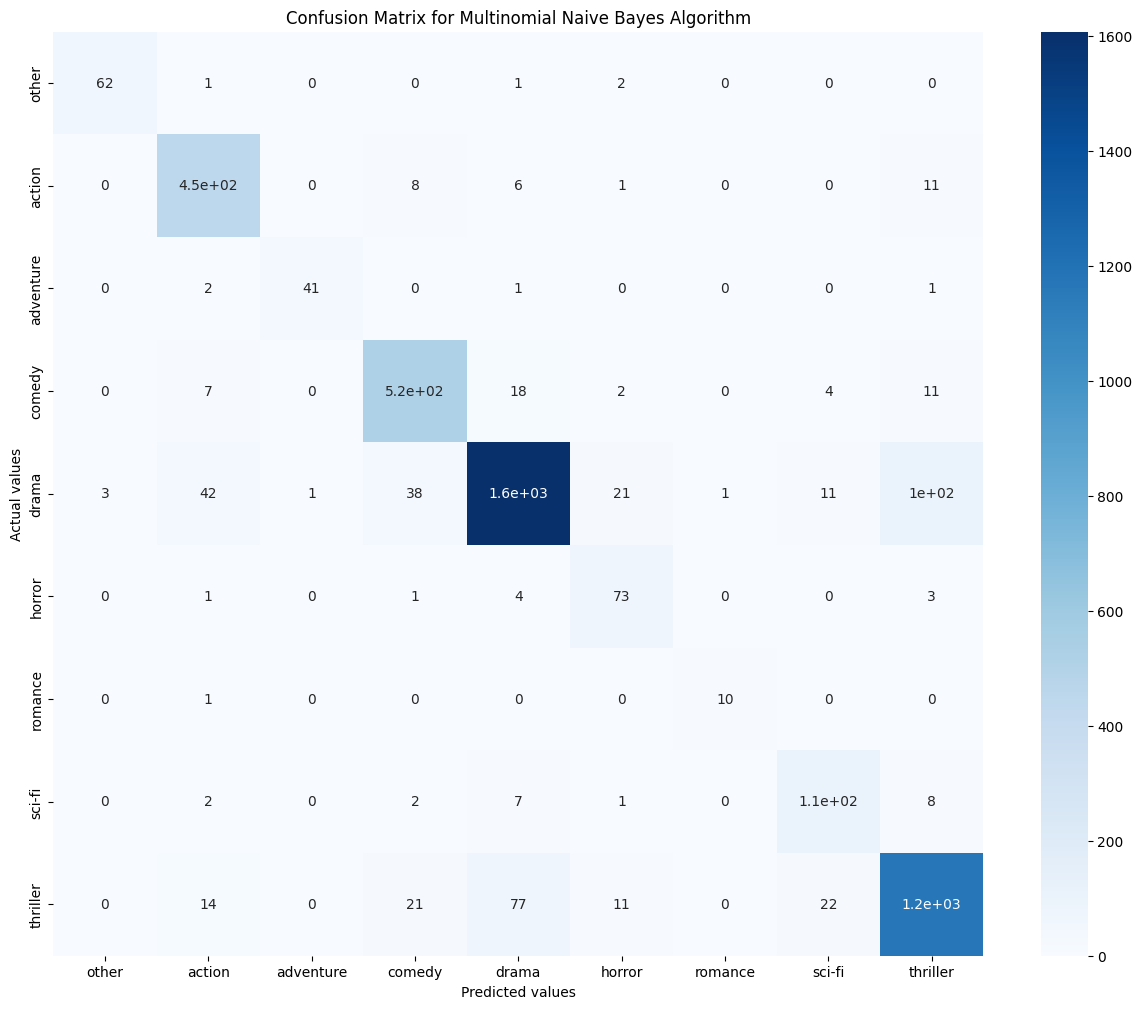

In [79]:
plt.figure(figsize=(15,12))
axis_labels = ['other','action','adventure','comedy','drama','horror','romance','sci-fi','thriller']
sns.heatmap(data=nb_cm,annot=True,cmap='Blues',xticklabels=axis_labels,yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [85]:
from sklearn.metrics import accuracy_score


In [86]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test ,temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
      best_accuracy = score
      alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))
    

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [87]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [88]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [89]:
from random import randint

In [91]:
test = pd.read_csv('kaggle_movie_test.csv')

In [92]:
test

,id,text
0,1,glances at her. BOOK Maybe I ought to learn t...
1,8,hout breaking stride. Tatiana sees her and can...
2,13,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,24,take myself. BRANDON How bad is the other thi...
4,38,"her body to shield his own. KAY Freeze it, Bug..."
...,...,...
5584,28140,Crazy Love script by Carol Watson COMMITTED f...
5585,28142,"break? You folks don't need a break, you need..."
5586,28154,egain control of his battered psyche. LIVIA Ca...
5587,28164,"t BEN GRIMM. A normal man. He smiles wide, sha..."


In [93]:
test.shape

(5589, 2)

In [96]:
test.isnull().any()

id      False
text    False
dtype: bool

In [97]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [98]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: OUS It's a monstrous floating city. Off in the distance is a blue and green planet, not unlike Earth. We hear a RINGING SOUND. INT. PEREZ CABIN CONTINUOUS DIETER PEREZ rolls over and clicks on a light. He fumbles for a button, presses it. Lowe inserts a data disk into the comm unit. PEREZ Lowe, you bastard. TV cover Lowe???? LOWE We hit the mother load. PEREZ Do you know what time it is? LOWE We're six parsecs away. How the hell do I know what time it is. We just hit a goldmine. PEREZ A box of DVD's isn't a gold mine. I told you, I can't move 'em. LOWE Just look at the file. Perez' computer DINGS, signaling the completion of the download. Perez looks at the readout. BACK TO LOWE'S CABIN PEREZ Two 400 year old frozen specimens. One well preserved. And, are you ready for this, one up and walking around. LOWE What? How much? PEREZ Enough to keep us in whisky and hookers til your liver rots and our peckers fall off. LOWE How much? PEREZ A large fortune. LOWE I got him frozen right 

In [99]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  you know the problem with unknowns, Viktor. If they're good, they get known. And then you're back to sorting their candy... and worse. kissing him on the cheek as she departs in her studio golf cart I'm sorry, Viktor. Viktor watches her depart down the canyon of stages, left alone on the deserted lot. EXT. STUDIO ENTRANCE DUSK Twenty NICOLA ANDERS' FACES jiggle into frame. VIKTOR's face appears amongst them. They are cardboard figures, standing together in the trailer of an electric cart. A WORKMAN is collecting the promotional standees from around the lot. VIKTOR places his hands on the neck of a cardboard cut out we sense he is about to rip her head off when a fourteen year old girl, LAINEY, appears beside him, carrying a laptop computer. LAINEY Hi, Dad. VIKTOR slightly ashamed Hello, sweetheart. Viktor, embarrassed by his childishness, steps aside for the suspicious workman who carries the standee away. Lainey smiles sweetly. She hugs him. LAINEY I'm sorry Mom canned you. V

In [100]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ctual speeches now. You'll have to chase them up. JAMES I will, thanks. ANN These are transcripts of various radio broadcasts, including Gaitskill's, the one they tried to stop. You ought to have that ... Betty knocks and enters. BETTY Excuse me. Phone call for Mr Penfield. ANN Take it here. JAMES Thanks. Hello... how did you get this number? I see. Look, I'm really sorry about last week, I... no, I'm up here researching something I... is she?.. . well, don't they have painkillers for that?... Oh, yeah... Look, tell her 111 be there... I can't just drop everything. It'll probably be the day after tomorrow... Right... Ok... yes, goodbye. to Ann It's a relative of mine. She's not very well. He sits down again I'm sorry. What were you saying? EXT. GARDEN DAY A couple of hours later. Susan sits on a bench re tying the lace of her walking boot. James stands, waiting. SUSAN Jeremy phoned this morning JAMES What did he want? SUSAN He's making plans for Brighton. He thought we could tr